# Lab 1: Machine Learning with Python
Joaquin Vanschoren, Pieter Gijsbers, Bilge Celik, Prabhant Singh

In [24]:
import matplotlib
import numpy as np
import pandas as pd

## Overview
* Why Python?
* Intro to scikit-learn
* Exercises

# Why Python?
* Many data-heavy applications are now developed in Python
* Highly readable, less complexity, fast prototyping
* Easy to offload number crunching to underlying C/Fortran/... 
* Easy to install and import many rich libraries
    - numpy: efficient data structures
    - scipy: fast numerical recipes
    - matplotlib: high-quality graphs
    - scikit-learn: machine learning algorithms
    - tensorflow: neural networks
    - ...

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/tut_ecosystem.jpg" alt="ml" style="width: 1000px;"/>

# Numpy, Scipy, Matplotlib
* See the tutorials (in the course GitHub)
* Many good tutorials online
    - [Jake VanderPlas' book and notebooks](https://github.com/jakevdp/PythonDataScienceHandbook)
    - [J.R. Johansson's notebooks](https://github.com/jrjohansson/scientific-python-lectures)
    - [DataCamp](https://www.datacamp.com)
    - ...

# scikit-learn
One of the most prominent Python libraries for machine learning:

* Contains many state-of-the-art machine learning algorithms
* Builds on numpy (fast), implements advanced techniques
* Wide range of evaluation measures and techniques
* Offers [comprehensive documentation](http://scikit-learn.org/stable/documentation) about each algorithm
* Widely used, and a wealth of [tutorials](http://scikit-learn.org/stable/user_guide.html) and code snippets are available 
* Works well with numpy, scipy, pandas, matplotlib,...

## Algorithms
See the [Reference](http://scikit-learn.org/dev/modules/classes.html)

__Supervised learning:__

* Linear models (Ridge, Lasso, Elastic Net, ...)
* Support Vector Machines
* Tree-based methods (Classification/Regression Trees, Random Forests,...)
* Nearest neighbors
* Neural networks 
* Gaussian Processes
* Feature selection

__Unsupervised learning:__
    
* Clustering (KMeans, ...)
* Matrix Decomposition (PCA, ...)
* Manifold Learning (Embeddings)
* Density estimation
* Outlier detection

__Model selection and evaluation:__

* Cross-validation
* Grid-search
* Lots of metrics

## Data import
Multiple options:

* A few toy datasets are included in `sklearn.datasets`
* Import [1000s of datasets](http://www.openml.org) via `sklearn.datasets.fetch_openml`
* You can import data files (CSV) with `pandas` or `numpy`

In [6]:
from sklearn.datasets import load_iris, fetch_openml
iris_data = load_iris()
dating_data = fetch_openml("SpeedDating", version=1)

These will return a `Bunch` object (similar to a `dict`)

In [8]:
print("Keys of iris_dataset: {}".format(iris_data.keys()))
print(iris_data['DESCR'][:193] + "\n...")

Keys of iris_dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


* Targets (classes) and features are lists of strings
* Data and target values are always numeric (ndarrays)

In [10]:
print("Targets: {}".format(iris_data['target_names']))
print("Features: {}".format(iris_data['feature_names']))
print("Shape of data: {}".format(iris_data['data'].shape))
print("First 5 rows:\n{}".format(iris_data['data'][:5]))
print("Targets:\n{}".format(iris_data['target']))

Targets: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape of data: (150, 4)
First 5 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Targets:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
test


## Building models
All scikitlearn _estimators_ follow the same interface

### Training and testing data
To evaluate our classifier, we need to test it on unseen data.  
`train_test_split`: splits data randomly in 75% training and 25% test data.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data['data'], iris_data['target'], 
    random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


We can also choose other ways to split the data. For instance, the following will create a training set of 10% of the data and a test set of 5% of the data. This is useful when dealing with very large datasets. `stratify` defines the target feature to stratify the data (ensure that the class distributions are kept the same).

In [12]:
X, y = iris_data['data'], iris_data['target']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X,y, stratify=y, train_size=0.1, test_size=0.05)
print("Xs_train shape: {}".format(Xs_train.shape))
print("Xs_test shape: {}".format(Xs_test.shape))

Xs_train shape: (15, 4)
Xs_test shape: (8, 4)


### Looking at your data (with pandas)

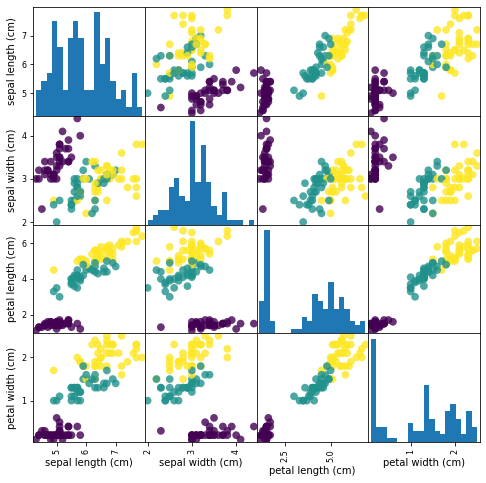

In [25]:
from pandas.plotting import scatter_matrix

# Build a DataFrame with training examples and feature names
iris_df = pd.DataFrame(X_train, 
                       columns=iris_data.feature_names)

# scatter matrix from the dataframe, color by class
sm = scatter_matrix(iris_df, c=y_train, figsize=(8, 8), 
                  marker='o', hist_kwds={'bins': 20}, s=60, 
                  alpha=.8)

### Fitting a model

The first model we'll build is a k-Nearest Neighbor classifier.  
kNN is included in `sklearn.neighbors`, so let's build our first model

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Making predictions
Let's create a new example and ask the kNN model to classify it

In [18]:
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_data['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


### Evaluating the model
Feeding all test examples to the model yields all predictions

In [19]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


The `score` function computes the percentage of correct predictions

``` python
knn.score(X_test, y_test)
```

In [20]:
print("Score: {:.2f}".format(knn.score(X_test, y_test) ))

Score: 0.97


Instead of a single train-test split, we can use `cross_validate` do run a cross-validation. 
It will return the test scores, as well as the fit and score times, for every fold.
By default, scikit-learn does a 5-fold cross-validation, hence returning 5 test scores.

In [22]:
!pip install -U joblib

In [21]:
from sklearn.model_selection import cross_validate
xval = cross_validate(knn, X, y, return_train_score=True, n_jobs=-1)
xval

{'fit_time': array([0.00036287, 0.00036716, 0.00039196, 0.00040913, 0.0004642 ]),
 'score_time': array([0.00064898, 0.00066113, 0.00066113, 0.00067782, 0.0006249 ]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]),
 'train_score': array([1., 1., 1., 1., 1.])}

The mean should give a better performance estimate

In [23]:
np.mean(xval['test_score'])

0.96

### Introspecting the model
Most models allow you to retrieve the trained model parameters, usually called `coef_`

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
lr.coef_

array([-0.15330146, -0.02540761,  0.26698013,  0.57386186])

Matching these with the names of the features, we can see which features are primarily used by the model

In [16]:
d = zip(iris_data.feature_names,lr.coef_)
set(d)

{('petal length (cm)', 0.2669801292888399),
 ('petal width (cm)', 0.5738618608875331),
 ('sepal length (cm)', -0.1533014564546793),
 ('sepal width (cm)', -0.025407610745503628)}

Please see the course notebooks for more examples on how to analyse models.